# MVP-Analise Exploratória - PUC-Rio
Aluno: Tales Gonçalves

# Objetivo:

Esta análise visa compreender os dados armazenados no aplicativo Strava que contém informações sobre as minhas atividades de ciclismo, corrida, musculação, entre outras e que são coletadas durante o uso de aparelho celular ou smart watch.

O objetivo será prever a frequência cardíaca média utilizando os atributos selecionados no dataset e treinar modelos clássicos de marchine learning utilizando métodos não supervisionados.

Para conhecimento de mais detalhes sobre o aplicativo Strava acesse www.strava.com, meu perfil https://www.strava.com/athletes/11601498.

Treinar modelos de machine learning para um problema de classificação ou regressão: Você deverá treinar modelos clássicos de machine learning, iniciando na carga e preparação dos dados, incluindo a separação entre treino e teste, a seleção de atributos, transformação de dados, modelagem, otimização de hiperparâmetros, até a avaliação e comparação de resultados dos modelos treinados. É recomendado o uso de cross-validation e a criação de pipelines, conforme apresentado no material do curso.

Treinar modelos de Deep Learning para um problema de visão computacional ou processamento de linguagem natural: Você deverá treinar modelos baseados em Deep Learning para resolver um problema de visão computacional ou processamento de linguagem natural, iniciando na carga e preparação dos dados, incluindo a separação entre treino e teste, modelagem, otimização de hiperparâmetros, até a avaliação e comparação de resultados dos modelos treinados.

## 1.1 Carga e Preparação dos dados

Carregamento das principais bibliotecas python para processamento de dados.

In [19]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import missingno as ms # para tratamento de missings
from datetime import datetime, timedelta
from sklearn.datasets import load_wine # para importar o dataset wine
from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.model_selection import cross_val_score # para executar a validação cruzada
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score # para a exibição da acurácia do modelo
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier # algoritmo KNN
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier # algoritmo Árvore de Classificação
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.tree import export_graphviz
from sklearn.naive_bayes import GaussianNB # algoritmo Naive Bayes
from sklearn.svm import SVC # algoritmo SVM
from sklearn.svm import SVR
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler # para normalização
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import(model_selection,preprocessing,)
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from yellowbrick.features.pca import PCADecomposition
from yellowbrick.features import FeatureImportances
from yellowbrick.regressor import ResidualsPlot
import pydotplus
from io import StringIO
from IPython.display import Image
import matplotlib.pyplot as plt
import dtreeviz
import xgboost as xgb
from seaborn import heatmap

### 1.1.1 Leitura dataset
Leitura de arquivo json que esta no repositório do Github

In [4]:
# lendo arquivo json e visualizando as 10 primeiras linhas
df = pd.read_json('https://raw.githubusercontent.com/tal-rsg/mvp-analise/main/activities_data.json')

# verificando se é um dataframe
type(df)

pandas.core.frame.DataFrame

In [5]:
df.columns

Index(['resource_state', 'athlete', 'name', 'distance', 'moving_time',
       'elapsed_time', 'total_elevation_gain', 'type', 'sport_type', 'id',
       'start_date', 'start_date_local', 'timezone', 'utc_offset',
       'location_city', 'location_state', 'location_country',
       'achievement_count', 'kudos_count', 'comment_count', 'athlete_count',
       'photo_count', 'map', 'trainer', 'commute', 'manual', 'private',
       'visibility', 'flagged', 'gear_id', 'start_latlng', 'end_latlng',
       'average_speed', 'max_speed', 'average_watts', 'kilojoules',
       'device_watts', 'has_heartrate', 'heartrate_opt_out',
       'display_hide_heartrate_option', 'elev_high', 'elev_low', 'upload_id',
       'upload_id_str', 'external_id', 'from_accepted_tag', 'pr_count',
       'total_photo_count', 'has_kudoed', 'workout_type', 'average_heartrate',
       'max_heartrate', 'average_temp', 'average_cadence'],
      dtype='object')

### 1.1.2 Limpeza
Devido a extenção de atributos no dataset selecionamos os principais que compreendemos serem os mais úteis para continuarmos e realizamos a limpeza dos valores nulos.

In [6]:
# criando um novo dataframe com a seleção de alguns atributos
df_strava = df.loc[(df['sport_type'] == "Ride") & (df['distance'] >= 10000),['distance','moving_time','total_elevation_gain','id','start_date','average_speed','max_speed','average_heartrate','max_heartrate', 'elev_high', 'elev_low','average_temp']]

df_strava.head()

,distance,moving_time,total_elevation_gain,id,start_date,average_speed,max_speed,average_heartrate,max_heartrate,elev_high,elev_low,average_temp
1,21101.3,6345,546.2,11128496798,2024-04-07T11:19:35Z,3.326,11.460,143.3,205.0,598.3,274.3,NaN
2,59764.2,11776,779.3,11119788506,2024-04-06T11:13:37Z,5.075,14.545,148.3,177.0,575.1,277.4,NaN
3,35162.6,6060,616.3,11097397399,2024-04-03T10:34:20Z,5.802,12.472,147.9,181.0,506.1,277.1,NaN
4,19566.0,3826,367.3,11089943617,2024-04-02T10:45:59Z,5.114,12.807,152.0,191.0,520.1,273.8,NaN
6,19546.4,4244,373.9,10992327291,2024-03-19T10:46:01Z,4.606,12.215,147.8,182.0,525.2,275.0,NaN


Text(0.5, 1.0, 'Verificando se há valores nulos')

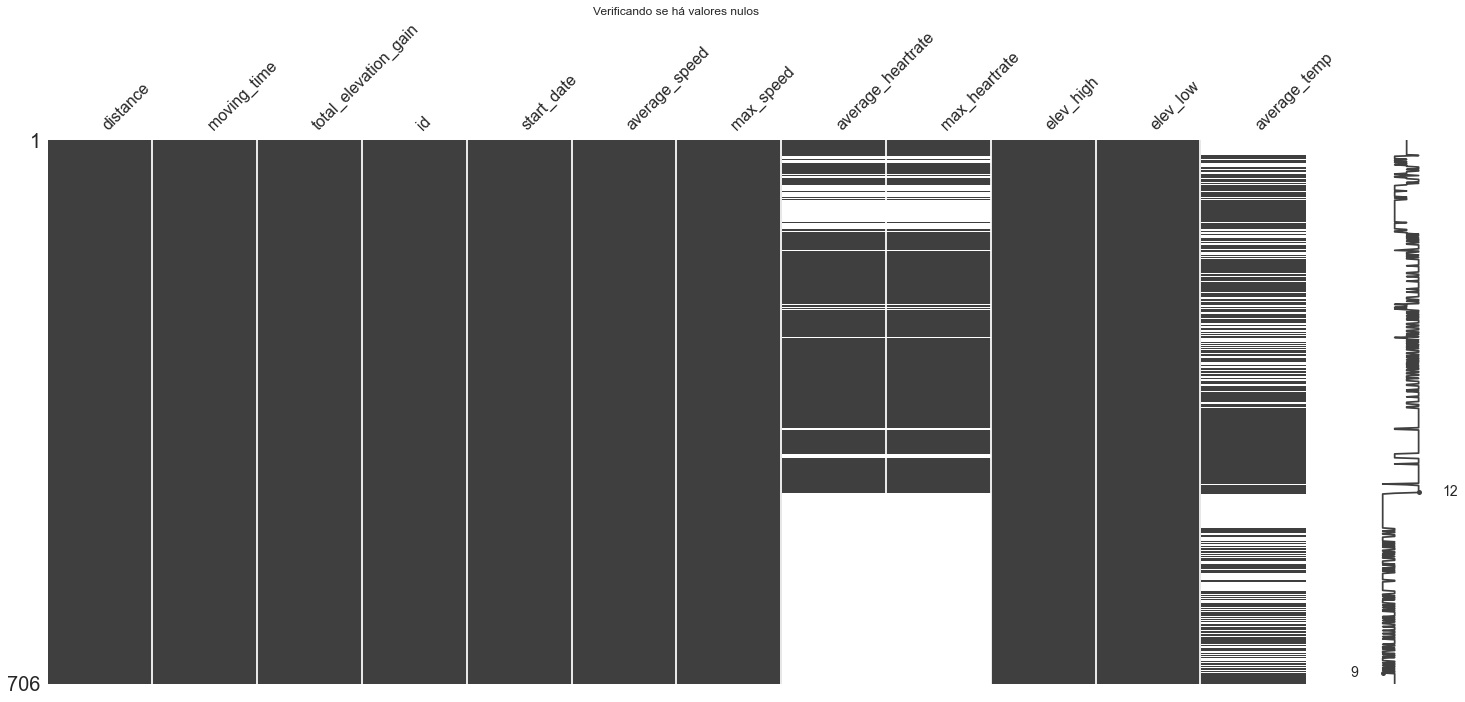

In [7]:
# exibindo visualização matricial da nulidade do dataset
ms.matrix(df_strava)
plt.title('Verificando se há valores nulos')

Tratando os valores nulos do dataset

Text(0.5, 1.0, 'Visulizando se há valores nulos')

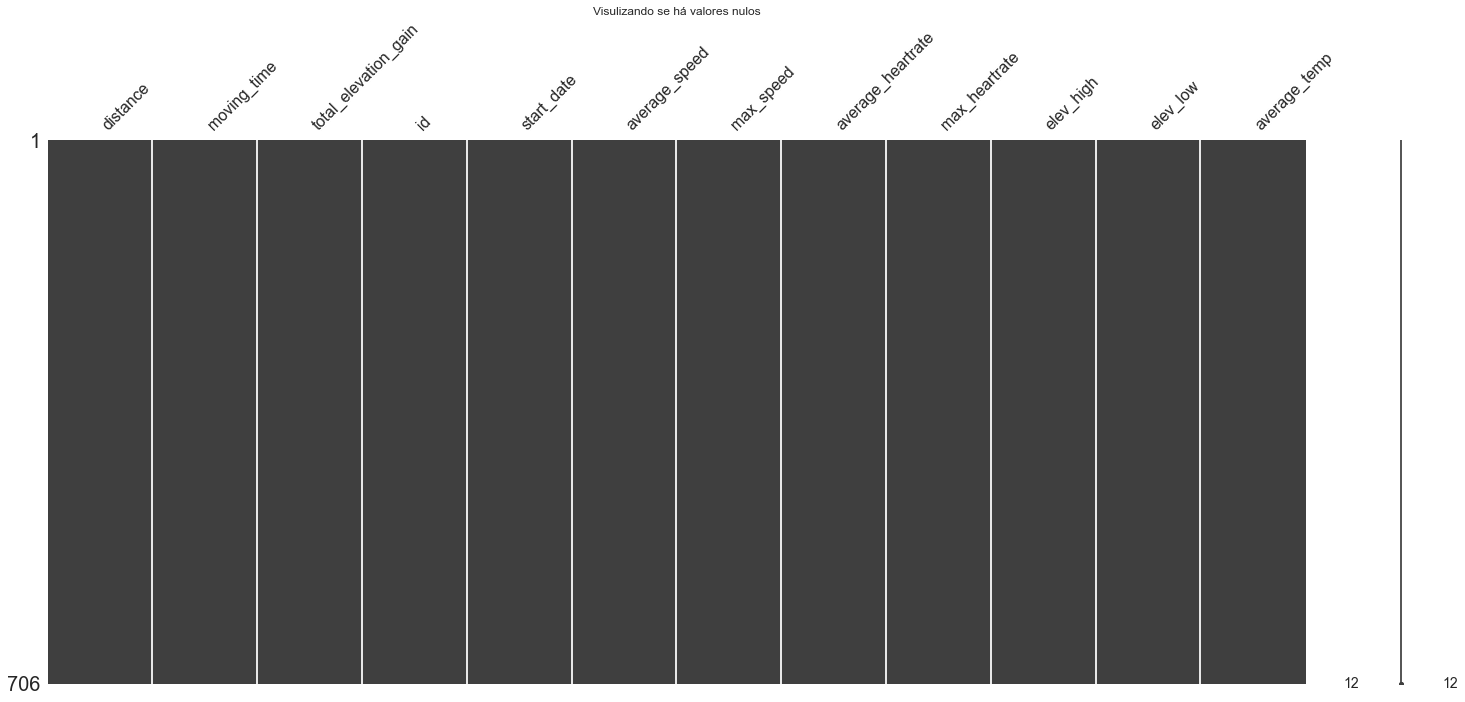

In [8]:
# substituindo os NaN de 'average_heartrate', 'max_heartrate' e 'average_temp' pela mediana da coluna
df_strava['average_heartrate'].fillna(df_strava['average_heartrate'].median(), inplace=True)
df_strava['max_heartrate'].fillna(df_strava['max_heartrate'].median(), inplace=True)
df_strava['average_temp'].fillna(df_strava['average_temp'].median(), inplace=True)

# visualizando se ha valores nulos
ms.matrix(df_strava)
plt.title('Visulizando se há valores nulos')

Inserindo novos atributos com base nos existente para melhor análise dos dados.

In [11]:
# convertendo o campo start_date para o tipo data
df_strava['start_date'] = pd.to_datetime(df_strava['start_date'])

# funcao para calcular a idade no periodo da atividade
def calculate_age(birthdate):
    current_date = datetime(1980,11,18)
    age = birthdate.year - current_date.year - ((current_date.month, current_date.day) < (birthdate.month, birthdate.day))
    return age

# criando a nova coluna com o calculo da idade no periodo da atividade
df_strava['Age'] = df_strava['start_date'].apply(calculate_age)

# função para calcular o Frequencia Cardiaca Maxima (FC max)
def calc_fcmax(fcmax):
    fc_max = 220 - fcmax
    return fc_max

# criando a nova coluna com o calculo do FC Max com base na coluna idade
df_strava['FCmax'] = df_strava['Age'].apply(calc_fcmax)

# visualizando o dataframe
df_strava.head()

,distance,moving_time,total_elevation_gain,id,start_date,average_speed,max_speed,average_heartrate,max_heartrate,elev_high,elev_low,average_temp,Age,FCmax
1,21101.3,6345,546.2,11128496798,2024-04-07 11:19:35+00:00,3.326,11.460,143.3,205.0,598.3,274.3,26.0,44,176
2,59764.2,11776,779.3,11119788506,2024-04-06 11:13:37+00:00,5.075,14.545,148.3,177.0,575.1,277.4,26.0,44,176
3,35162.6,6060,616.3,11097397399,2024-04-03 10:34:20+00:00,5.802,12.472,147.9,181.0,506.1,277.1,26.0,44,176
4,19566.0,3826,367.3,11089943617,2024-04-02 10:45:59+00:00,5.114,12.807,152.0,191.0,520.1,273.8,26.0,44,176
6,19546.4,4244,373.9,10992327291,2024-03-19 10:46:01+00:00,4.606,12.215,147.8,182.0,525.2,275.0,26.0,44,176


Neste ponto será criado o alvo (target) com base no atributo 'average_heartrate' (média de batimentos) para as próximas análises.

In [17]:
df_strava['target'] = df_strava['average_heartrate']

df_stravatrain = df_strava.loc[:,['distance', 'moving_time', 'total_elevation_gain', 'id', 
       'average_speed', 'max_speed', 'max_heartrate',
       'elev_high', 'elev_low', 'average_temp', 'Age', 'FCmax', 'target']]

df_stravatrain.head()

,distance,moving_time,total_elevation_gain,id,average_speed,max_speed,max_heartrate,elev_high,elev_low,average_temp,Age,FCmax,target
1,21101.3,6345,546.2,11128496798,3.326,11.460,205.0,598.3,274.3,26.0,44,176,143.3
2,59764.2,11776,779.3,11119788506,5.075,14.545,177.0,575.1,277.4,26.0,44,176,148.3
3,35162.6,6060,616.3,11097397399,5.802,12.472,181.0,506.1,277.1,26.0,44,176,147.9
4,19566.0,3826,367.3,11089943617,5.114,12.807,191.0,520.1,273.8,26.0,44,176,152.0
6,19546.4,4244,373.9,10992327291,4.606,12.215,182.0,525.2,275.0,26.0,44,176,147.8


Visualizando a correlação dos atributos.

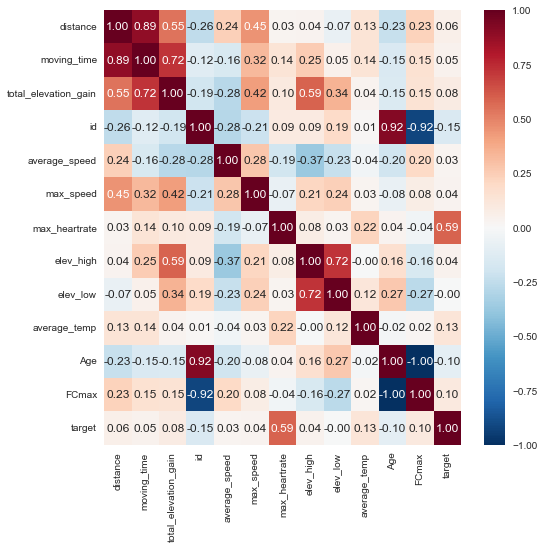

In [20]:
fig, ax = plt.subplots(figsize=(8,8))
ax = heatmap(
    df_stravatrain.corr(),
    fmt=".2f",
    annot=True,
    ax=ax,
    cmap="RdBu_r",
    vmin=-1,
    vmax=1,

)

## Normalizando
Para um melhor desempenho é necessário normalizar os dados.

In [18]:
# separando o array em componentes de input e output
X = df_stravatrain.values[:,0:12]
y = df_stravatrain.values[:,12]

# Normalizando os dados
rescaledX = MinMaxScaler().fit_transform(X)

# Exibindo os dados transformados
print("Dados Originais: \n\n", df_stravatrain.values)
print("\nDados Normalizados: \n\n", rescaledX)

Dados Originais: 

 [[2.11013e+04 6.34500e+03 5.46200e+02 ... 4.40000e+01 1.76000e+02
  1.43300e+02]
 [5.97642e+04 1.17760e+04 7.79300e+02 ... 4.40000e+01 1.76000e+02
  1.48300e+02]
 [3.51626e+04 6.06000e+03 6.16300e+02 ... 4.40000e+01 1.76000e+02
  1.47900e+02]
 ...
 [7.92123e+04 1.35950e+04 7.80000e+01 ... 3.50000e+01 1.85000e+02
  1.51900e+02]
 [4.76690e+04 7.90000e+03 5.60000e+01 ... 3.50000e+01 1.85000e+02
  1.51900e+02]
 [2.81511e+04 1.07660e+04 1.07300e+03 ... 3.50000e+01 1.85000e+02
  1.51900e+02]]

Dados Normalizados: 

 [[0.05820628 0.15465901 0.19761216 ... 0.53846154 1.         0.        ]
 [0.26114644 0.30608376 0.28194645 ... 0.53846154 1.         0.        ]
 [0.13201353 0.14671276 0.22297395 ... 0.53846154 1.         0.        ]
 ...
 [0.36322881 0.35680031 0.02821997 ... 0.65384615 0.1        0.9       ]
 [0.19765917 0.19801483 0.02026049 ... 0.5        0.1        0.9       ]
 [0.09521043 0.27792338 0.3882055  ... 0.42307692 0.1        0.9       ]]


In [28]:
# Preparação dos dados

# Separação em bases de treino e teste (holdout)
array = df_stravatrain.values
#X = array[:,0:12] # atributos
y = array[:,12] # classe (target)

X_train, X_test, y_train, y_test = train_test_split(rescaledX, y, test_size=0.20, random_state=7) # faz a divisão

# Criando os folds para a validação cruzada
num_particoes = 10 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7) # faz o particionamento em 10 folds

print(y)

[143.3 148.3 147.9 152.  147.8 148.2 149.8 148.8 152.8 147.4 151.9 139.6
 146.8 154.5 151.3 149.9 146.1 149.6 146.4 155.9 155.9 151.9 151.9 151.9
 151.9 147.8 151.9 151.9 150.9 151.9 147.7 154.9 151.9 148.2 145.1 142.3
 152.9 154.8 148.9 154.5 161.1 138.  156.6 144.9 151.9 151.9 147.4 151.9
 151.9 147.5 147.2 152.4 141.9 158.7 154.5 154.  164.4 156.4 150.5 151.9
 151.9 151.9 151.9 151.9 151.9 151.9 155.6 151.9 151.9 151.9 151.9 151.9
 151.9 151.9 152.  151.9 123.7 164.7 151.9 151.9 151.9 151.9 151.9 151.9
 151.9 151.9 151.9 151.9 151.9 151.9 151.9 151.9 151.9 151.9 151.9 151.9
 151.9 151.9 151.9 151.9 151.9 151.9 151.9 151.9 151.9 151.9 151.9 135.7
 151.9 151.9 151.9 151.9 151.9 151.9 151.9 151.9 134.8 146.7 151.9 151.9
 148.7 164.8 147.6 147.  148.3 141.8 130.2 159.3 156.8 153.  147.2 143.9
 148.1 148.5 154.7 152.6 155.6 149.4 155.  152.8 151.7 144.7 156.  151.9
 155.3 154.7 157.7 161.8 163.7 153.  154.9 161.1 151.1 148.7 148.3 152.8
 157.6 161.1 141.4 142.7 149.6 144.  146.  154.9 14

In [29]:
# Modelagem

# Definindo uma seed global para esta célula de código
np.random.seed(3) 

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Avaliando um modelo por vez
for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # média e desvio padrão dos 10 resultados da validação cruzada
  print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure() 
fig.suptitle('Comparação da Acurácia dos Modelos') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names) 
plt.show()

ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\tales\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\tales\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\tales\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py", line 238, in fit
    return self._fit(X, y)
  File "c:\Users\tales\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_base.py", line 500, in _fit
    check_classification_targets(y)
  File "c:\Users\tales\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\multiclass.py", line 221, in check_classification_targets
    raise ValueError(
ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.


In [30]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200))) 
models.append(('KNN', KNeighborsClassifier())) 
models.append(('CART', DecisionTreeClassifier())) 
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base_classifier = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(DecisionTreeClassifier(), n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10)) 
fig.suptitle('Comparação dos Modelos') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names) 
plt.show()

ValueError: Supported target types are: ('binary', 'multiclass'). Got 'continuous' instead.

### Criação e avaliação de modelos: dados padronizados e normalizados

LR-orig: 0.993 (0.012)
KNN-orig: 0.934 (0.014)
CART-orig: 0.998 (0.005)
NB-orig: 0.966 (0.018)
SVM-orig: 0.943 (0.007)
Bag-orig: 1.000 (0.000)
RF-orig: 1.000 (0.000)
ET-orig: 1.000 (0.000)
Ada-orig: 1.000 (0.000)
GB-orig: 1.000 (0.000)
Vot-orig: 0.996 (0.007)
LR-padr: 1.000 (0.000)
KNN-padr: 1.000 (0.000)
CART-padr: 1.000 (0.000)
NB-padr: 1.000 (0.000)
SVM-padr: 0.996 (0.007)
Bag-padr: 1.000 (0.000)
RF-padr: 1.000 (0.000)
ET-padr: 1.000 (0.000)
Ada-padr: 0.998 (0.005)
GB-padr: 1.000 (0.000)
Vot-padr: 1.000 (0.000)
LR-norm: 1.000 (0.000)
KNN-norm: 1.000 (0.000)
CART-norm: 1.000 (0.000)
NB-norm: 1.000 (0.000)
SVM-norm: 1.000 (0.000)
Bag-norm: 1.000 (0.000)
RF-norm: 1.000 (0.000)
ET-norm: 1.000 (0.000)
Ada-norm: 1.000 (0.000)
GB-norm: 1.000 (0.000)
Vot-norm: 1.000 (0.000)


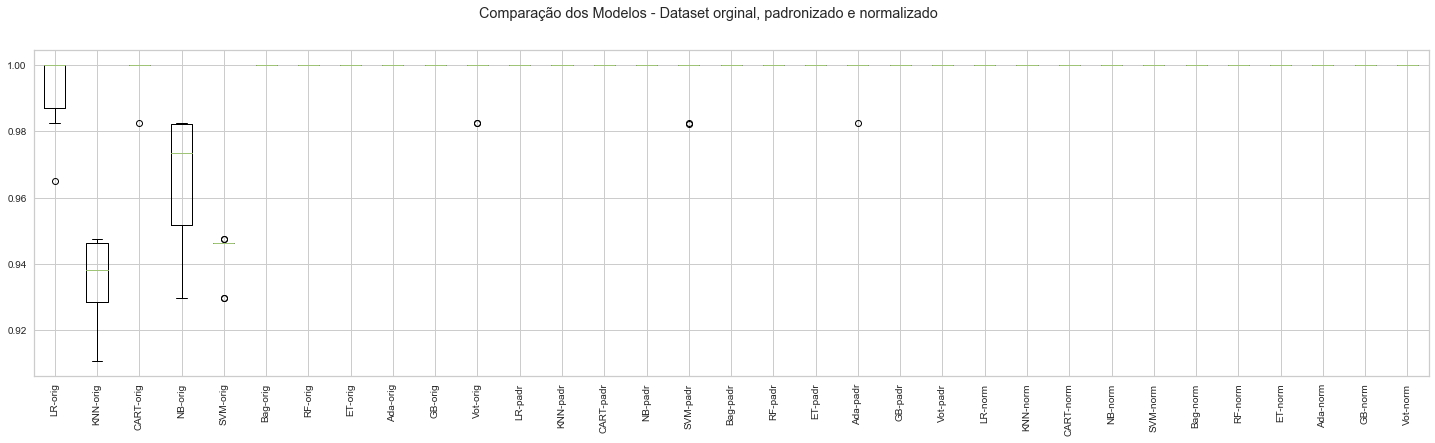

In [30]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(DecisionTreeClassifier(), n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log]))) 
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log]))) 
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging]))) 
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log]))) 
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging]))) 
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names, rotation=90)
plt.show()

### finalização do modelo

In [31]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = LogisticRegression(max_iter=200)
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))
     

1.0


### K-Means

[[-0.77628628 -0.14581602 -0.0353025  ...  3.74046179  0.23303124
   0.23850834]
 [ 1.2484836   1.49063581  0.66961061 ... -0.066436    0.23303124
   0.23850834]
 [-0.03989825 -0.23169132  0.17668553 ...  0.47740654  0.23303124
   0.23850834]
 ...
 [ 2.26697749  2.03873117 -1.45117688 ... -0.4610893   0.23303124
   0.23850834]
 [ 0.61505992  0.32273169 -1.51770664 ... -0.4610893   0.23303124
   0.23850834]
 [-0.40708939  1.18630579  1.55778299 ... -0.4610893   0.23303124
   0.23850834]]


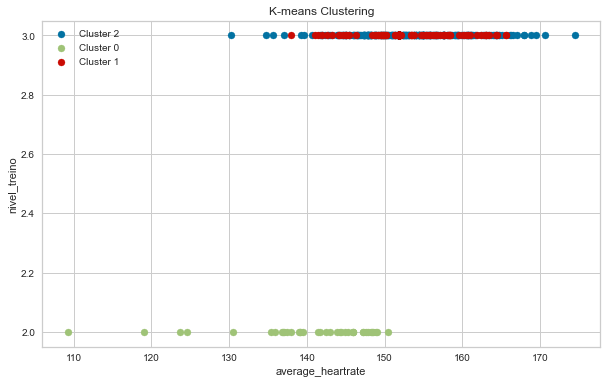

In [32]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

# Perform K-means clustering
kmeans = KMeans(n_clusters=3,random_state=42)  # You can change the number of clusters as needed
kmeans.fit(scaled_data)

# Add cluster labels to DataFrame
df_stravatrain['cluster'] = kmeans.labels_

# View the results
print(scaled_data)

# Plot the clusters
plt.figure(figsize=(10, 6))
for cluster in df_stravatrain['cluster'].unique():
    plt.scatter(df_stravatrain[df_stravatrain['cluster'] == cluster]['average_heartrate'], df_stravatrain[df_stravatrain['cluster'] == cluster]['nivel_treino'], label=f'Cluster {cluster}')

plt.title('K-means Clustering')
plt.xlabel('average_heartrate')
plt.ylabel('nivel_treino')
plt.legend()
plt.show()

In [33]:
df_stravatrain.head()

,distance,moving_time,total_elevation_gain,average_speed,max_speed,average_heartrate,max_heartrate,elev_high,elev_low,average_temp,Age,FCmax,zona_freq,zona_treino,nivel_treino,target,cluster
1,21101.3,6345,546.2,3.326,11.460,143.3,205.0,598.3,274.3,26.0,44,176,116.477273,5,3,3,2
2,59764.2,11776,779.3,5.075,14.545,148.3,177.0,575.1,277.4,26.0,44,176,100.568182,5,3,3,2
3,35162.6,6060,616.3,5.802,12.472,147.9,181.0,506.1,277.1,26.0,44,176,102.840909,5,3,3,2
4,19566.0,3826,367.3,5.114,12.807,152.0,191.0,520.1,273.8,26.0,44,176,108.522727,5,3,3,2
6,19546.4,4244,373.9,4.606,12.215,147.8,182.0,525.2,275.0,26.0,44,176,103.409091,5,3,3,2


In [35]:

#X1 = pd.concat([X_train,X_test])
#y1 = pd.concat([y_train, y_test])

#fig, ax = plt.subplots(figsize=(6,4))

#colors = ["rg"[j] for j in y1]
#pca_viz = PCADecomposition(color=colors)
#pca_viz.fit_transform(X1,y1)
#pca_viz.poof()

### Regressão

In [36]:
df_lrstravatrain = df_strava.loc[:,['distance','moving_time','total_elevation_gain','average_speed','max_speed','elev_high', 'elev_low','average_temp', 'Age', 'FCmax']]

df_lrstravatrain['target'] = df_strava['average_heartrate']

df_lrstravatrain.head()

,distance,moving_time,total_elevation_gain,average_speed,max_speed,elev_high,elev_low,average_temp,Age,FCmax,target
1,21101.3,6345,546.2,3.326,11.460,598.3,274.3,26.0,44,176,143.3
2,59764.2,11776,779.3,5.075,14.545,575.1,277.4,26.0,44,176,148.3
3,35162.6,6060,616.3,5.802,12.472,506.1,277.1,26.0,44,176,147.9
4,19566.0,3826,367.3,5.114,12.807,520.1,273.8,26.0,44,176,152.0
6,19546.4,4244,373.9,4.606,12.215,525.2,275.0,26.0,44,176,147.8


In [37]:
# Separação em bases de treino e teste (holdout)
array = df_lrstravatrain.values
lr_X = array[:,0:10] # atributos
lr_y = array[:,10] # classe (target)

lrX_train, lrX_test, lry_train, lry_test = train_test_split(lr_X, lr_y, test_size=0.3, random_state=42) # faz a divisão

In [38]:
lr_sX = preprocessing.StandardScaler().fit_transform(lr_X)
sX_train, sX_test, sy_train, sy_test = model_selection.train_test_split(lr_sX, lr_y, test_size=0.3, random_state=42)

In [39]:
dr = DummyRegressor()
dr.fit(lrX_train, lry_train)
dr.score(lrX_test, lry_test)

-0.0001384024972834741

In [40]:
lr = LinearRegression()
lr.fit(lrX_train, lry_train)

LinearRegression()

In [41]:
lr.score(lrX_test, lry_test)

0.02135534722581256

In [42]:
lr.coef_

array([-2.73737478e-05,  3.22661509e-05,  2.02724874e-03,  5.45288367e-01,
       -8.87641984e-02,  2.61007407e-03, -3.19806392e-03,  2.53191533e-01,
       -9.04953940e-02,  9.04953940e-02])

In [43]:
lr2 = LinearRegression()
lr2.fit(sX_train, sy_train)

LinearRegression()

In [44]:
lr2.score(sX_test, sy_test)

0.02135534722581267

In [45]:
lr2.intercept_

151.8983770727291

In [46]:
lr2.coef_

array([-0.52270062,  0.10708379,  0.6703687 ,  0.85982175, -0.2388686 ,
        0.51216506, -0.3474265 ,  0.86667735, -0.22055624,  0.22055624])

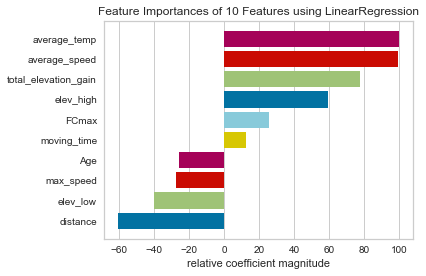

<AxesSubplot:title={'center':'Feature Importances of 10 Features using LinearRegression'}, xlabel='relative coefficient magnitude'>

In [47]:
fig, ax = plt.subplots(figsize=(6,4))
fi_viz = FeatureImportances(lr2, labels=df_lrstravatrain.columns)
fi_viz.fit(lr_X, lr_y)
fi_viz.poof()

### SVMs

In [48]:
svr = SVR()
svr.fit(sX_train, sy_train)

SVR()

In [49]:
svr.score(sX_test, sy_test)

0.06718880804318994

### K vizinhos mais próximos

In [50]:
knr = KNeighborsRegressor()
knr.fit(sX_train, sy_train)

KNeighborsRegressor()

In [51]:
knr.score(sX_test, sy_test)

0.08021802350851548

### Árvore de decisão

In [52]:
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(lrX_train, lry_train)

DecisionTreeRegressor(random_state=42)

In [53]:
dtr.score(lrX_test, lry_test)

-0.5862595673653128

In [54]:
df_lrstravatrain.columns

Index(['distance', 'moving_time', 'total_elevation_gain', 'average_speed',
       'max_speed', 'elev_high', 'elev_low', 'average_temp', 'Age', 'FCmax',
       'target'],
      dtype='object')

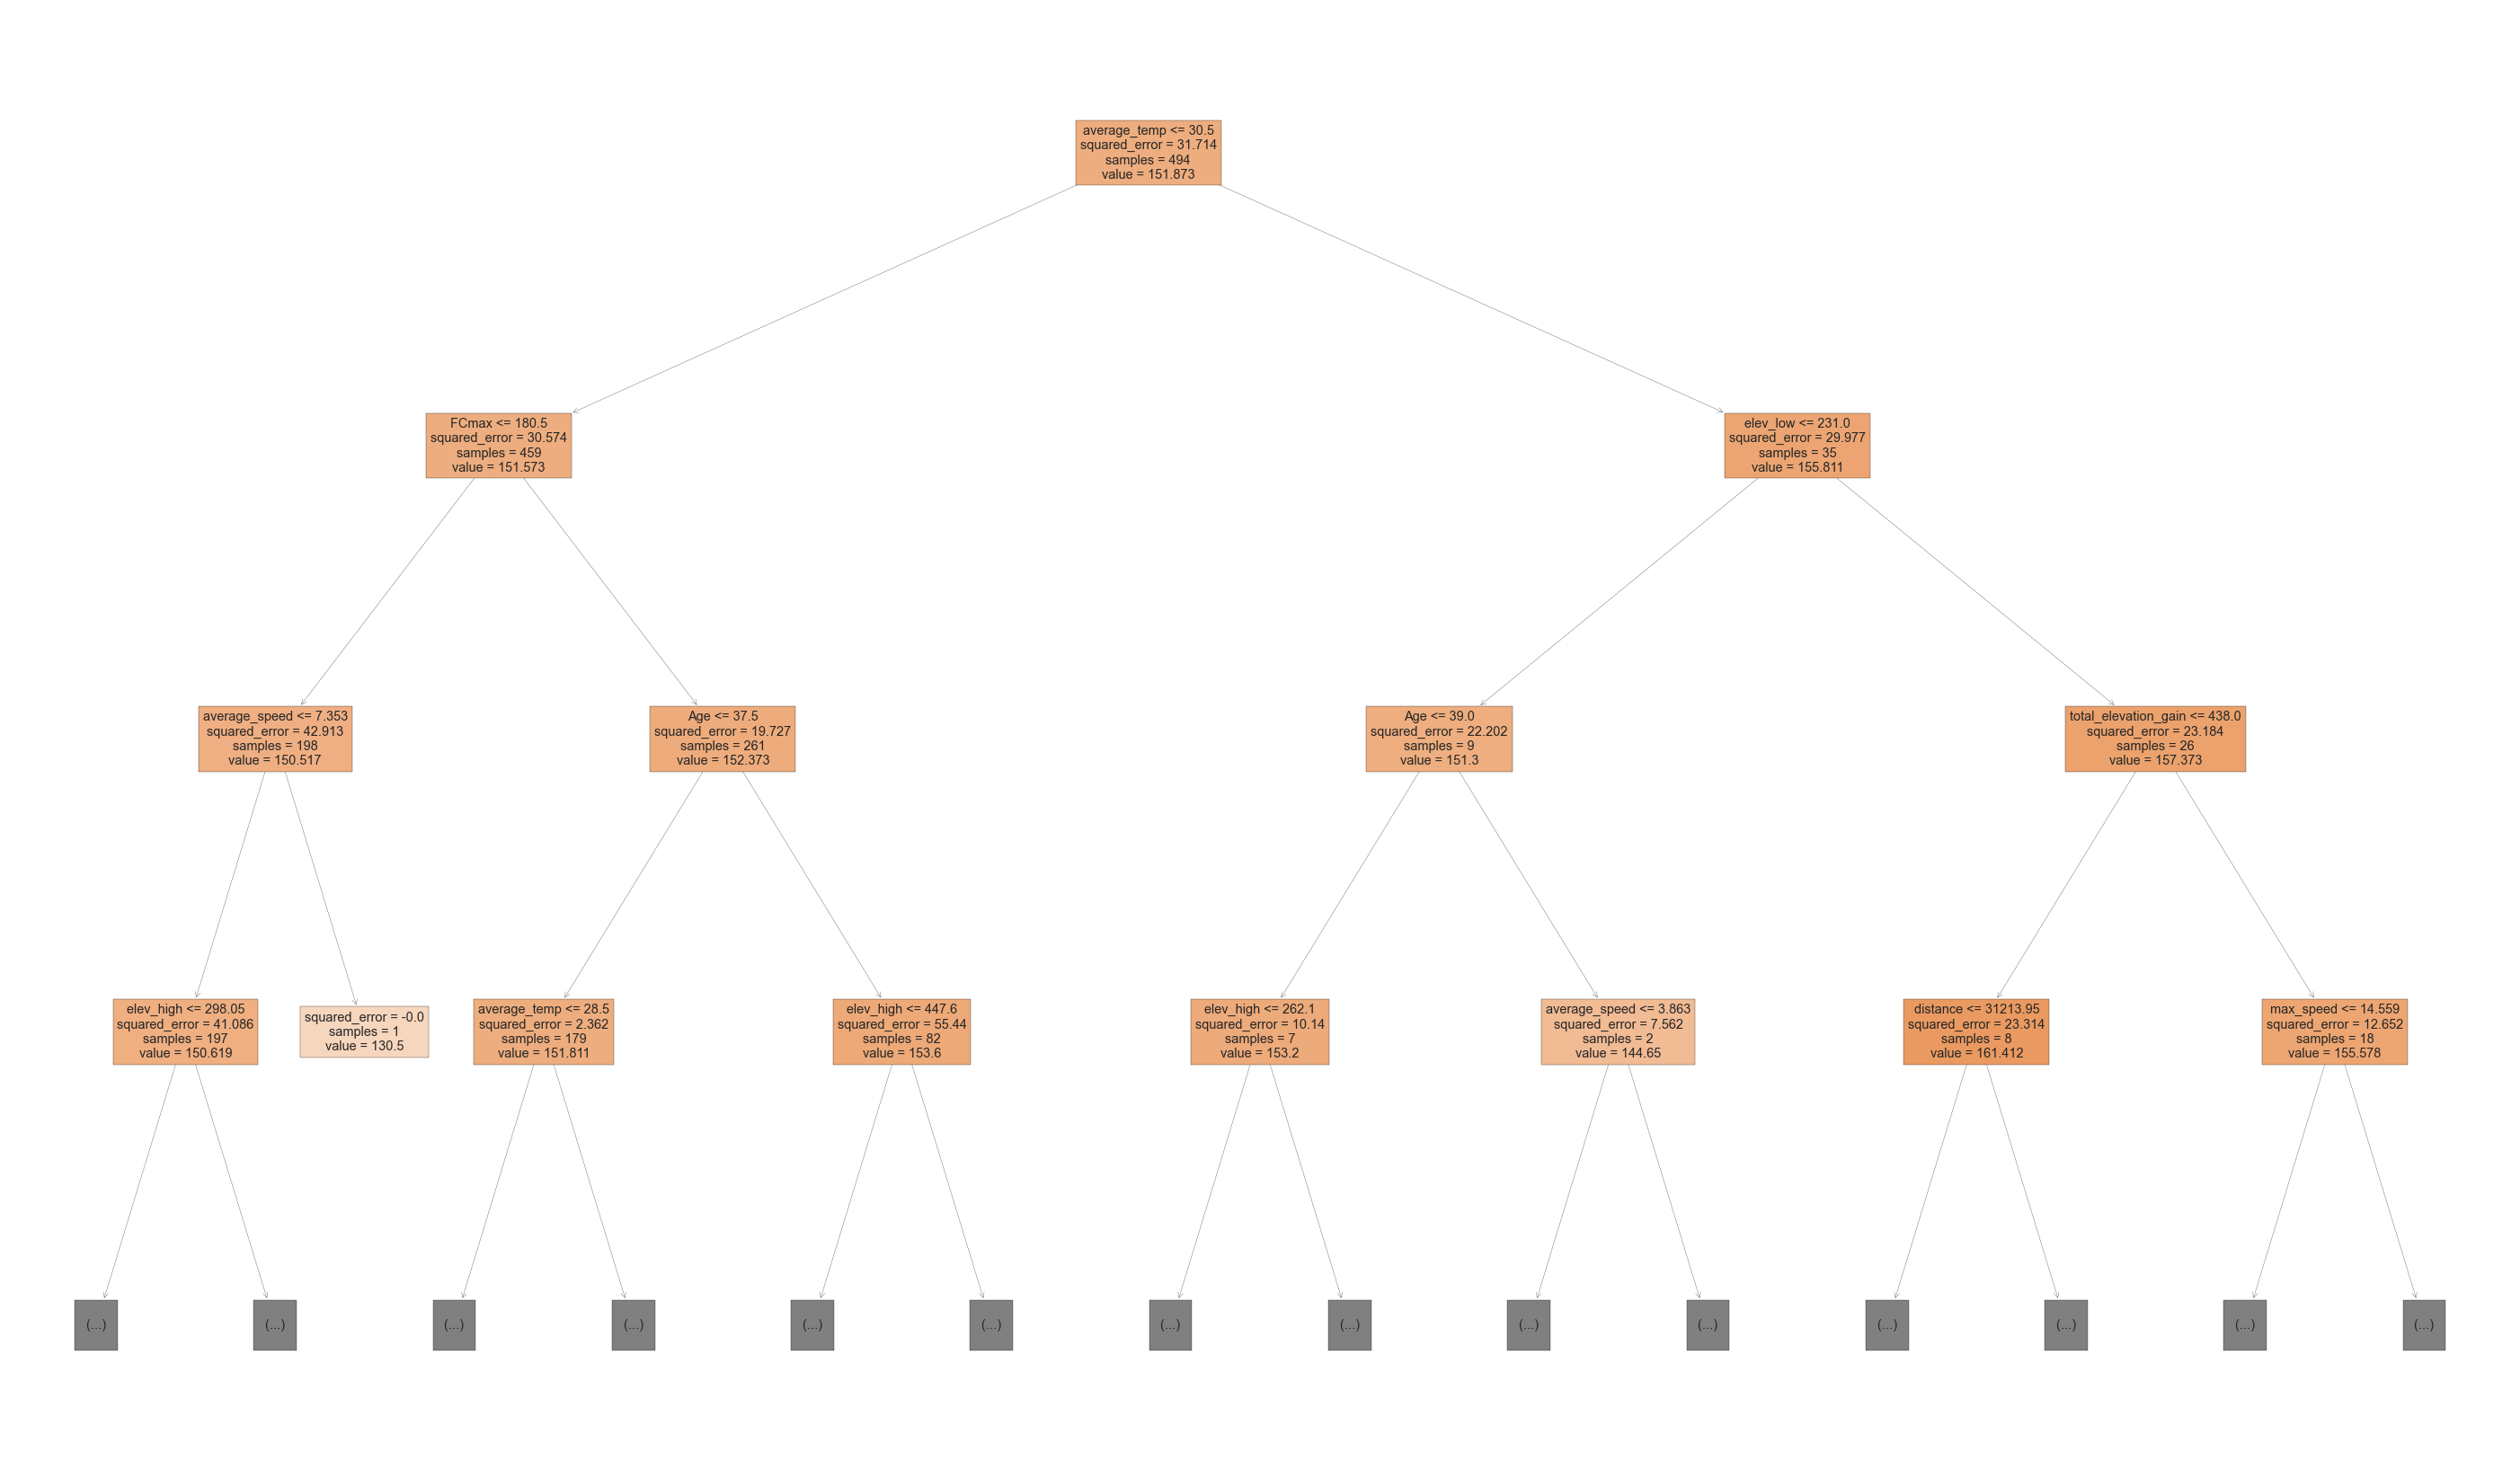

In [55]:
# Plot the CART model
plt.figure(figsize=(50, 30))
plot_tree(dtr, max_depth=3, filled=True, feature_names=df_lrstravatrain.columns, class_names=[str(x) for x in df_lrstravatrain['target'].unique()]) #df_lrstravatrain['target'].astype(str))
plt.show()

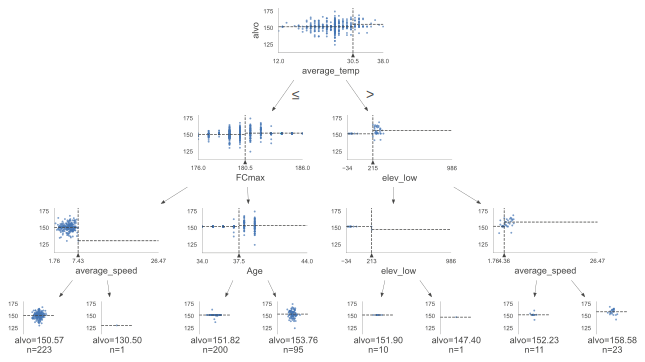

In [57]:
import dtreeviz.trees


arraylr = df_lrstravatrain.values

dc_X = array[:,0:10] # atributos
dc_y = array[:,10] # classe (target)

dcX_train, dcX_test, dcy_train, dcy_test = train_test_split(dc_X, dc_y, test_size=0.2, random_state=42)

dtr3 = DecisionTreeRegressor(max_depth=3)
dtr3.fit(dcX_train, dcy_train)
viz = dtreeviz.model(
    dtr3,
    dcX_train,
    dcy_train,
    target_name="alvo",
    feature_names=df_lrstravatrain.columns,
)
viz.view()

In [58]:
# importancia dos atributos

for col, val in sorted(
    zip(
        df_lrstravatrain.columns, dtr.feature_importances_
    ),
    key=lambda x: x[1],
    reverse=True,
)[:5]:
    print(f"{col:10}{val:10.3f}")

elev_low       0.197
elev_high      0.168
average_speed     0.144
distance       0.126
max_speed      0.091


In [61]:
# floresta aleatória

rfr = RandomForestRegressor(
    random_state=42, n_estimators=100
)
rfr.fit(lrX_train, lry_train)

RandomForestRegressor(random_state=42)

In [62]:
rfr.score(lrX_test, lry_test)

0.025178963971857038

In [63]:
# importancia dos atritubos da árvore
for col, val in sorted(
    zip(
        df_lrstravatrain.columns, rfr.feature_importances_
    ),
    key=lambda x: x[1],
    reverse=True,
)[:5]:
    print(f"{col:10}{val:10.3f}")

elev_low       0.144
elev_high      0.140
max_speed      0.134
average_speed     0.122
total_elevation_gain     0.109


### Regressão XGBosst

In [66]:
xgr = xgb.XGBRegressor(random_state=42)
xgr.fit(lrX_train, lry_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [67]:
xgr.score(lrX_test, lry_test)

-0.021832266546794044

In [70]:
xgr.predict(lr_X[[0]])

array([143.3033], dtype=float32)

In [71]:
for col, val in sorted(
    zip(
        df_lrstravatrain.columns, xgr.feature_importances_
    ),
    key=lambda x: x[1],
    reverse=True,
)[:5]:
    print(f"{col:10}{val:10.3f}")

elev_low       0.154
Age            0.149
max_speed      0.140
elev_high      0.136
average_temp     0.129


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

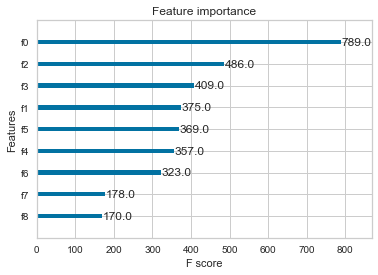

In [72]:
fig, ax = plt.subplots(figsize=(6,4))
xgb.plot_importance(xgr,ax=ax)

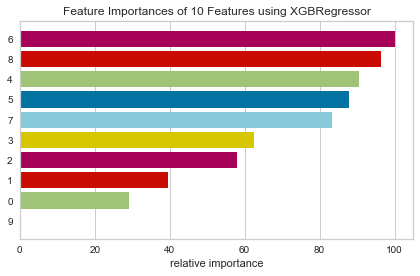

<AxesSubplot:title={'center':'Feature Importances of 10 Features using XGBRegressor'}, xlabel='relative importance'>

In [74]:
fig, ax = plt.subplots(figsize=(6,4))
fi_viz = FeatureImportances(xgr)
fi_viz.fit(lrX_train, lry_train)
fi_viz.poof()

<AxesSubplot:>

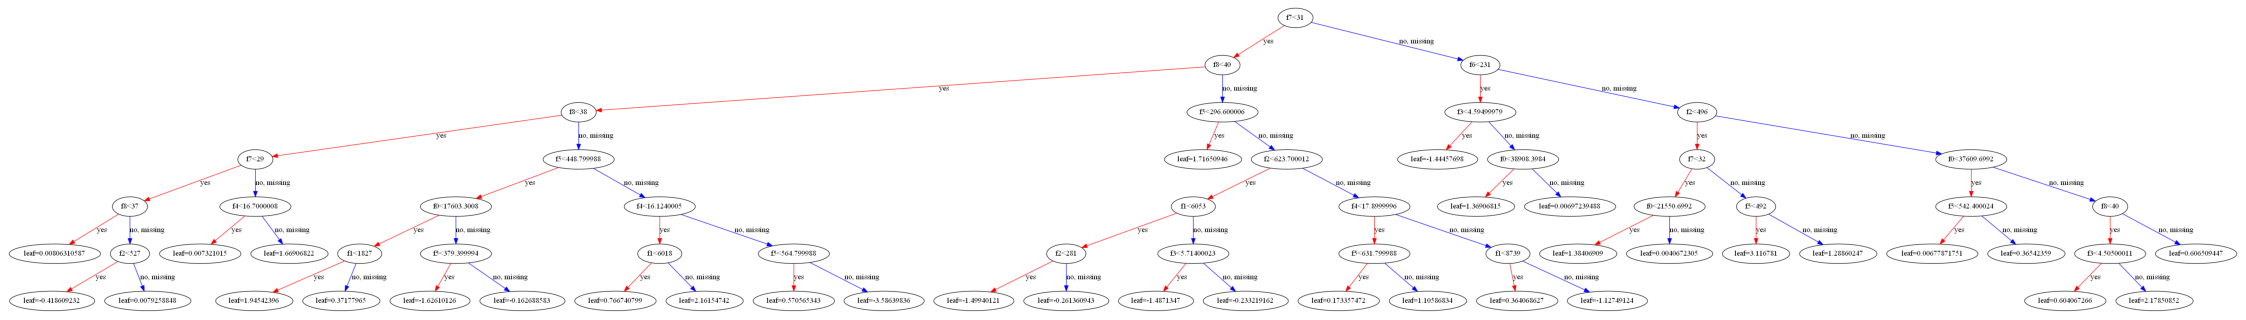

In [76]:
fig, ax = plt.subplots(figsize=(40,10))
xgb.plot_tree(xgr, ax=ax, num_trees=0)

### Métricas e avaiação de regressao

In [78]:
rfr.score(lrX_test, lry_test)

0.025178963971857038

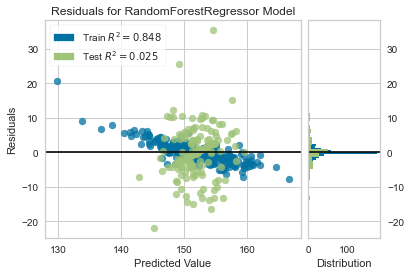

<AxesSubplot:title={'center':'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [81]:
# grafico de resíduos
fig, ax = plt.subplots(figsize=(6,4))

rpv = ResidualsPlot(rfr)
rpv.fit(lrX_train, lry_train)
rpv.score(lrX_test, lry_test)
rpv.poof()


## Finalização do modelo

In [ ]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = LogisticRegression(max_iter=200)
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

### Simulando a aplicação do modelo em dados não vistos

In [ ]:
# Novos dados - não sabemos a classe!
data = {'preg':  [1, 9, 5],
        'plas': [90, 100, 110],
        'pres': [50, 60, 50],
        'skin': [30, 30, 30],
        'test': [100, 100, 100],
        'mass': [20.0, 30.0, 40.0],
        'pedi': [1.0, 2.0, 1.0],
        'age': [15, 40, 40],  
        }

atributos = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']
entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:8].astype(float)

# Padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)

In [ ]:
# Predição de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)
print(saidas)
     